In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# File to Load 
city_data_df = pd.read_csv(r"C:\Users\16504\PyBer_Analysis\city_data.csv")
ride_data_df = pd.read_csv(r"C:\Users\16504\PyBer_Analysis\ride_data.csv")

In [3]:
print(city_data_df)

                city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]


In [4]:
print(ride_data_df)

                    city                 date   fare        ride_id
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344
...                  ...                  ...    ...            ...
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298

[2375 rows x 4 columns]


In [5]:
### Merge the DataFrames

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
## Deliverable 1: Get a Summary DataFrame 

In [8]:
#  1. Get the total rides for each city type

In [9]:
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(type_ride_count)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [10]:
# 2. Get the total drivers for each city type

In [11]:
driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [12]:
#  3. Get the total amount of fares for each city type

In [13]:
fare_count_per_city = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_count_per_city.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
#  4. Get the average fare per ride for each city type. 

In [41]:
type_avg_fare = fare_count_per_city / type_ride_count 
print(type_avg_fare)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [16]:
# 5. Get the average fare per driver for each city type. 

In [42]:
avg_driver_per_type = fare_count_per_city / driver_count 
print(avg_driver_per_type)

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64


In [43]:
#  6. Create a PyBer summary DataFrame. 

In [44]:
pyber_summary_df = pd.DataFrame({
             "Total Rides": type_ride_count,
             "Total Drivers": driver_count,
             "Total Fares": fare_count_per_city,
             "Average Fare per Driver": avg_driver_per_type, 
             "Average Fare Per Ride": type_avg_fare})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver,Average Fare Per Ride
type,,,,,
Rural,125,537,4327.93,8.059460,34.623440
Suburban,625,8570,19356.33,2.258615,30.970128
Urban,1625,59602,39854.38,0.668675,24.525772


In [45]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [46]:
#  8. Format the columns.

In [47]:
# Format the Total School Budget and the Per Student Budget columns.
pyber_summary_df["Total Fares"].map('${:,.2f}'.format)

pyber_summary_df["Average Fare Per Ride"].map('${:,.2f}'.format)


# Display the data frame
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver,Average Fare Per Ride
Rural,125,537,4327.93,8.059460,34.623440
Suburban,625,8570,19356.33,2.258615,30.970128
Urban,1625,59602,39854.38,0.668675,24.525772


In [48]:
## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame

In [25]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Driver,Average Fare Per Ride
Rural,125,537,4327.93,0.124078,34.623440
Suburban,625,8570,19356.33,0.442749,30.970128
Urban,1625,59602,39854.38,1.495494,24.525772


In [26]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

In [27]:
sum_fares_df = pyber_data_df.groupby(['type', 'date']).sum()[["fare"]]
sum_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [28]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fares_df.reset_index()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [29]:
sum_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [ ]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

In [30]:
pivot_table = pd.pivot_table(sum_fares_df, values=['fare'], index=['date'], columns=['type'])
print(pivot_table)

                     fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

In [33]:
date_df = pivot_table.loc['2019-01-01':'2019-04-29', :]
print(date_df)

                     fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]


In [34]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_df.index = pd.to_datetime(date_df.index)
print(date_df.index)

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)


In [35]:
# 7. Check that the datatype for the index is datetime using df.info()

In [36]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

In [38]:
fare_week = date_df.resample('W').sum()
print(fare_week)

              fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29


In [39]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

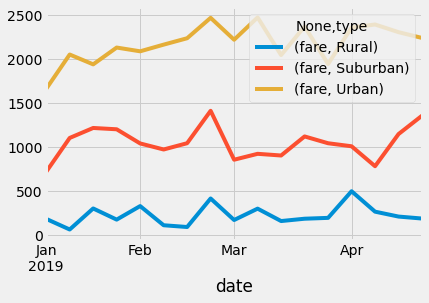

In [76]:
ax = fare_week.plot()